# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [5]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
original_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col = 'date',
    parse_dates = True,
    infer_datetime_format = True)
original_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26
...,...,...,...,...,...
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [7]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
daily_returns = original_df.pct_change().dropna()
# Review the first five rows of the daily returns DataFrame.
daily_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='date'>

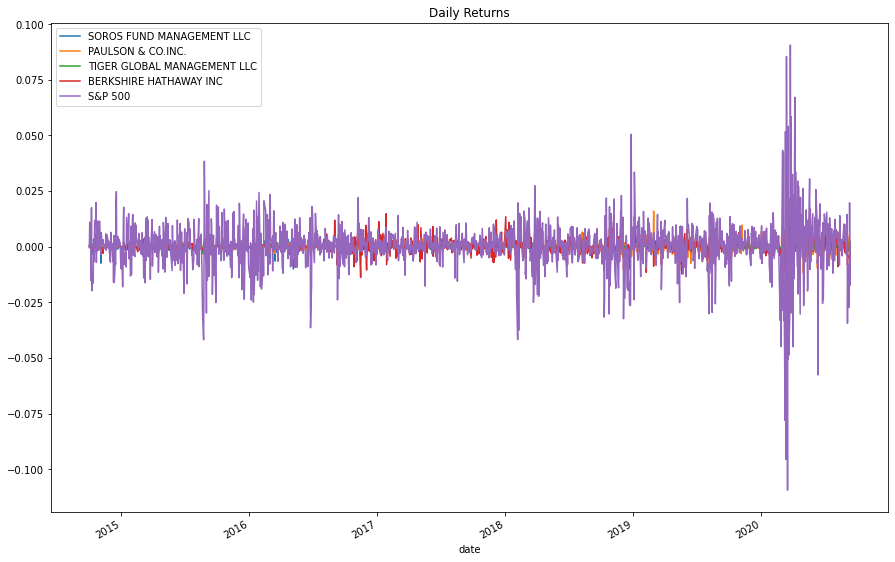

In [8]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
daily_returns.plot(title='Daily Returns',
                   figsize=(15,10))


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [11]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns Portfolio'}, xlabel='date'>

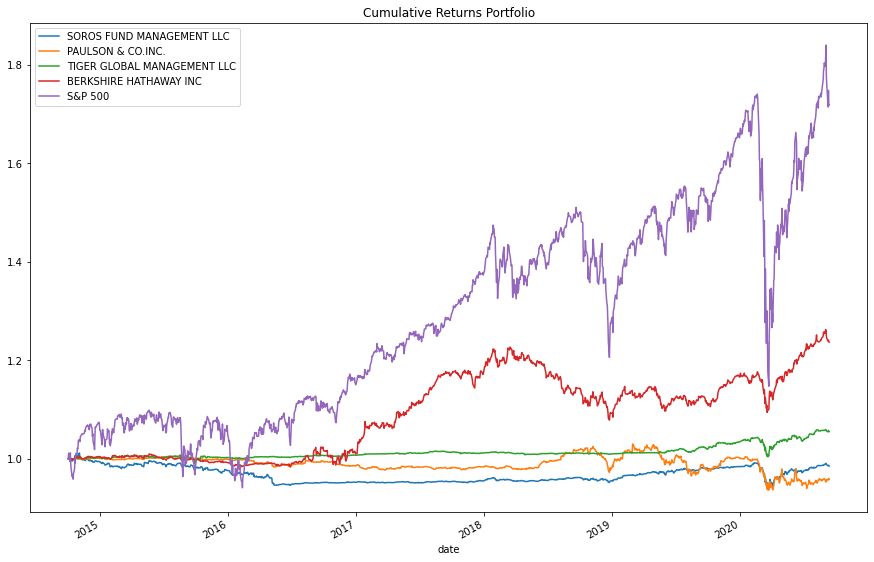

In [12]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
cumulative_returns.plot(title="Cumulative Returns Portfolio",
                        figsize=(15,10))

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** None of the fund portfolios outperform the S&P 500 index over time. However near the last quarter of 2015, we can see that the four portfolios did perform better than the S&P500 Index but only briefly and through what appears to be the first 2 months of 2016.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns Portfolio Volatility'}>

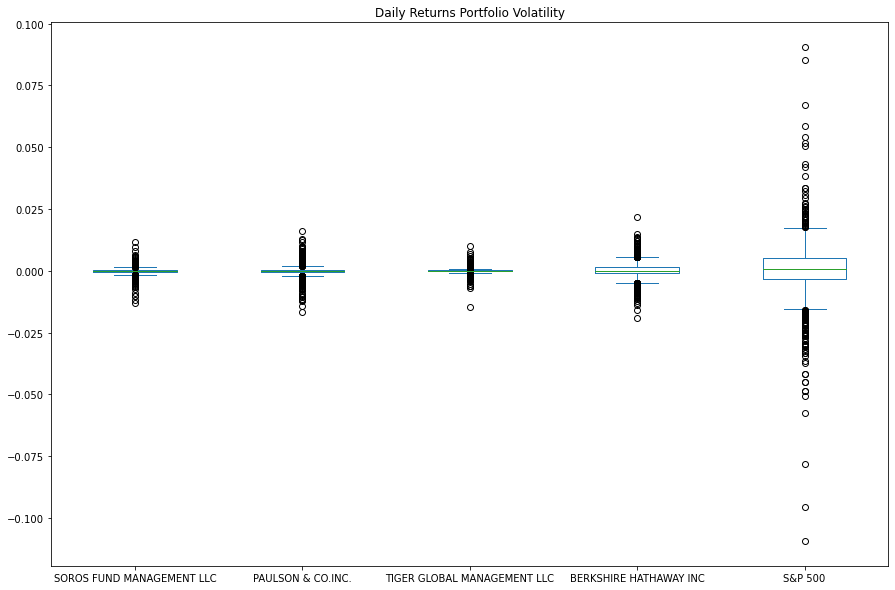

In [13]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
daily_returns.plot.box(title="Daily Returns Portfolio Volatility",
                       figsize=(15,10))


#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Daily Returns'}>

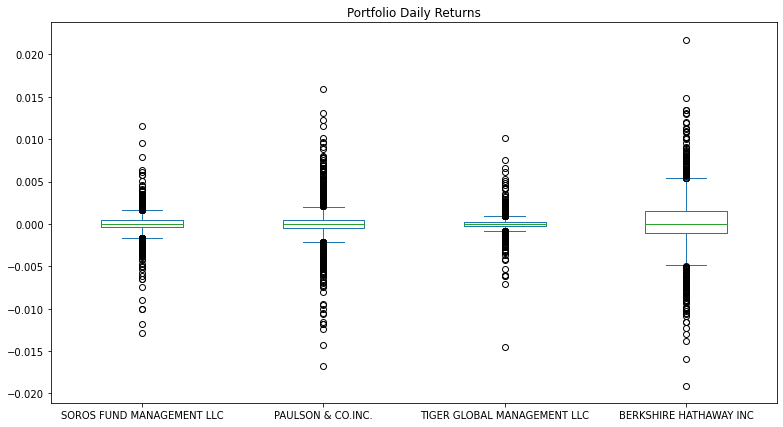

In [16]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
portfolio_daily_returns = daily_returns.drop(columns="S&P 500")
portfolio_daily_returns.plot.box(title="Portfolio Daily Returns",
                                 figsize=(13,7))


#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** 
Fund most volatile is Berkshire. The fund that is the least volatile is between Tiger Global and Soros Fund Management. There needs to be furhter analysis between these two to compare each spread. After calculating the value of each, we can see that Soros Fund has the smallest spread value, therefore is the least volatile.

In [25]:
soros = daily_returns["SOROS FUND MANAGEMENT LLC"].describe()
soros_spread = abs(soros['max']) + abs(soros['min'])
print(f'Soros Fund Spread: {soros_spread:.6f}')

tiger = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].describe()
tiger_spread = abs(tiger['max']) + abs(tiger['min'])
print(f'Tiger Global Spread: {tiger_spread:.6f}')



Soros Fund Spread: 0.024415
Tiger Global Spread: 0.024691


### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [32]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
daily_returns.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [49]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# Calculate the annualized std dev: multiplying the std dev (std) for the daily_returns by the square root (np.sqrt) of the number of trading days in 1 year

daily_returns_annualized_std = daily_returns.std() * np.sqrt(252)
daily_returns_annualized_std.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Fund Portfolio and S&P500: 21 Day Rolling Std Dev'}, xlabel='date'>

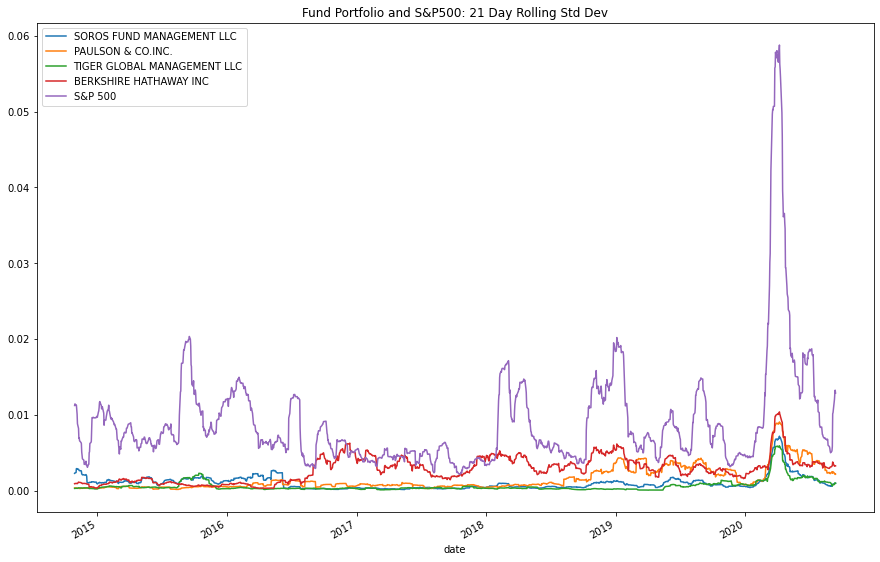

In [70]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
daily_returns.rolling(window=21).std().plot(title ="Fund Portfolio and S&P500: 21 Day Rolling Std Dev",
                                            figsize=(15,10))


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Fund Portfolio: 21 Day Rolling Std Dev'}, xlabel='date'>

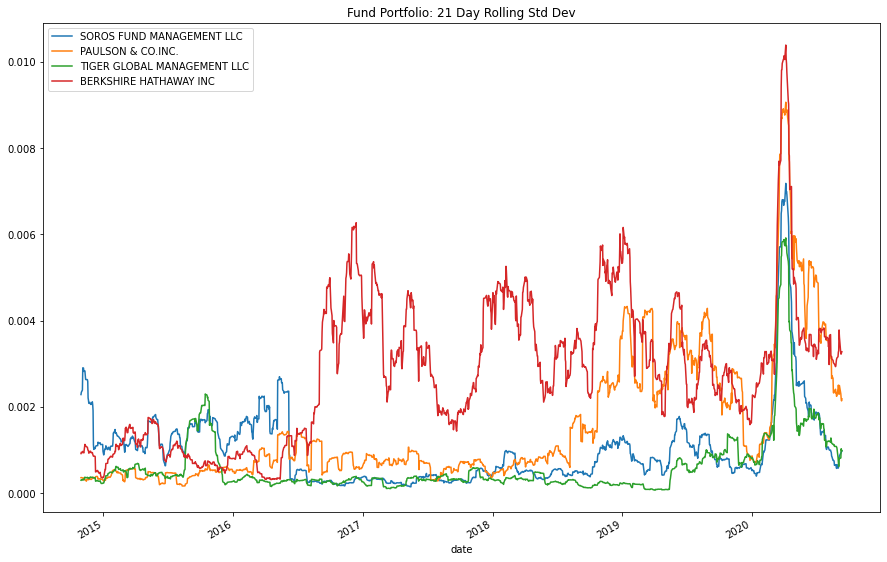

In [71]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
portfolio_daily_returns.rolling(window=21).std().plot(title ="Fund Portfolio: 21 Day Rolling Std Dev",
                                            figsize=(15,10))

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** Neither of the porfolios pose more risk than the S&P500, based on annualized standard deviation observation as depicted above.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** There appears to be some congruency the overall trend of each portfolio and how each responds to the market. We can observe that all the portfolios increased nearly at the same time with very close risk metrics after the year 2020, likely due to the Pandemic.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** We obseve that the Soros Fund has the highest risk from the year 2015 to mid 2016. Then Berkshire Hathaway begins to progressively increase its risk and it becomes higher than the other 3 portfolios. Such trend remains through the duration of our time analysis. 

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [51]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
avg_annual_return = daily_returns.mean() * 252
avg_annual_return.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [55]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
print("Portfolio Sharpe Ratios")
sharpe_ratio = avg_annual_return / daily_returns_annualized_std
sharpe_ratio.sort_values()


Portfolio Sharpe Ratios


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

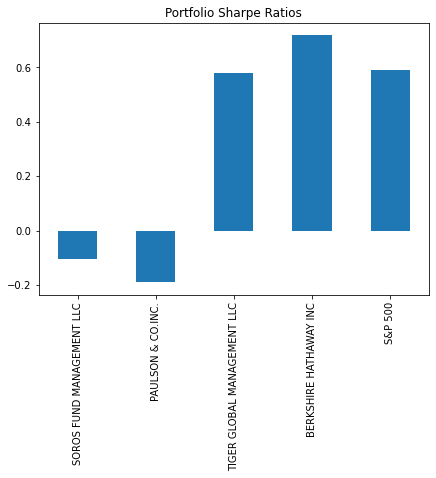

In [73]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
sharpe_ratio.plot.bar(title="Portfolio Sharpe Ratios",
                      figsize=(7,5))


#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** Berkshire Hathaway offers the best risk-return profile, while Paulson & CO has the worst or lower risk return profile.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

Based on the Sharpe Ratio, the portfolios with the best risk return profiles are Bersksire Hathaway, and Tiger Global.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

S&P 500 Variance from 60 day rolling window
date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64



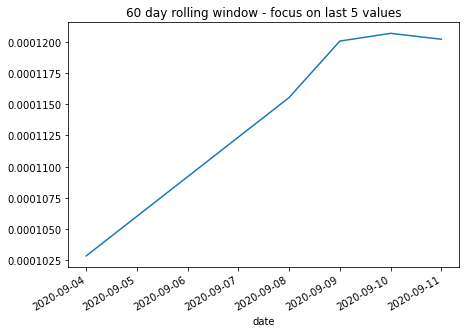

In [110]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
sp500_variance_60rolling = daily_returns["S&P 500"].rolling(window=60).var().dropna()
print("S&P 500 Variance from 60 day rolling window")
print(sp500_variance_60rolling.tail())
sp500_variance_60rolling.tail().plot(
    title="60 day rolling window - focus on last 5 values",
    figsize=(7,5))
print()


#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [82]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
print()
print("Berkshire Hathaway -Covariance with S&P500")
berkshire_covariance = daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(sp500_variance_60rolling).dropna()
berkshire_covariance.tail()



Berkshire Hathaway -Covariance with S&P500


date
2020-09-04    7.537738e-08
2020-09-08    5.979353e-08
2020-09-09    4.478451e-08
2020-09-10    3.565820e-08
2020-09-11    3.034646e-08
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [83]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
print()
print("Berkshire Hathaway -Portfolio Beta")
berkshire_beta = berkshire_covariance / sp500_variance_60rolling 
berkshire_beta.tail()



Berkshire Hathaway -Portfolio Beta


date
2020-09-04    0.000733
2020-09-08    0.000517
2020-09-09    0.000373
2020-09-10    0.000295
2020-09-11    0.000252
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [84]:
# Calculate the average of the 60-day rolling beta
print()
print("Berkshire Hathaway - Average 60 Day Rolling Beta")
berkshire_beta_avg = berkshire_beta.mean()
print(f"{berkshire_beta_avg: .8f}")



Berkshire Hathaway - Average 60 Day Rolling Beta
 0.00006585


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.


Berkshire Hathaway - Average 60 Day Rolling Beta


<AxesSubplot:title={'center':'Berkshire Hathaway: 60 Day Rolling Beta. Years 2015 to 2020'}, xlabel='date'>

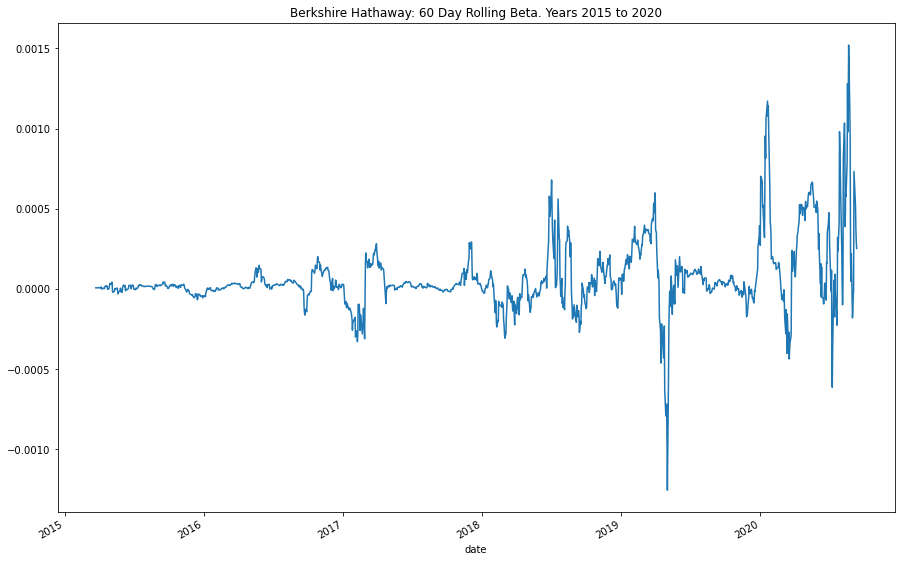

In [87]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
print()
print("Berkshire Hathaway - Average 60 Day Rolling Beta")
berkshire_beta.plot(figsize=(15,10),
                    title="Berkshire Hathaway: 60 Day Rolling Beta. Years 2015 to 2020")


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [88]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
tiger_covariance = daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(sp500_variance_60rolling).dropna()
tiger_covariance.tail()

date
2020-09-04    2.712286e-09
2020-09-08   -2.454167e-09
2020-09-09   -1.081029e-08
2020-09-10   -1.501395e-08
2020-09-11   -1.450795e-08
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [89]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
print()
print("TIGER GLOBAL -Portfolio Beta")
tiger_beta = tiger_covariance / sp500_variance_60rolling 
tiger_beta.tail()



TIGER GLOBAL -Portfolio Beta


date
2020-09-04    0.000026
2020-09-08   -0.000021
2020-09-09   -0.000090
2020-09-10   -0.000124
2020-09-11   -0.000121
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [90]:
# Calculate the average of the 60-day rolling beta
print()
print("TIGER GLOBAL - Average 60 Day Rolling Beta")
tiger_beta_avg = tiger_beta.mean()
print(f"{tiger_beta_avg: .8f}")



TIGER GLOBAL - Average 60 Day Rolling Beta
 0.00001977


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.


TIGER GLOBAL - Average 60 Day Rolling Beta


<AxesSubplot:title={'center':'TIGER GLOBAL: 60 Day Rolling Beta. Years 2015 to 2020'}, xlabel='date'>

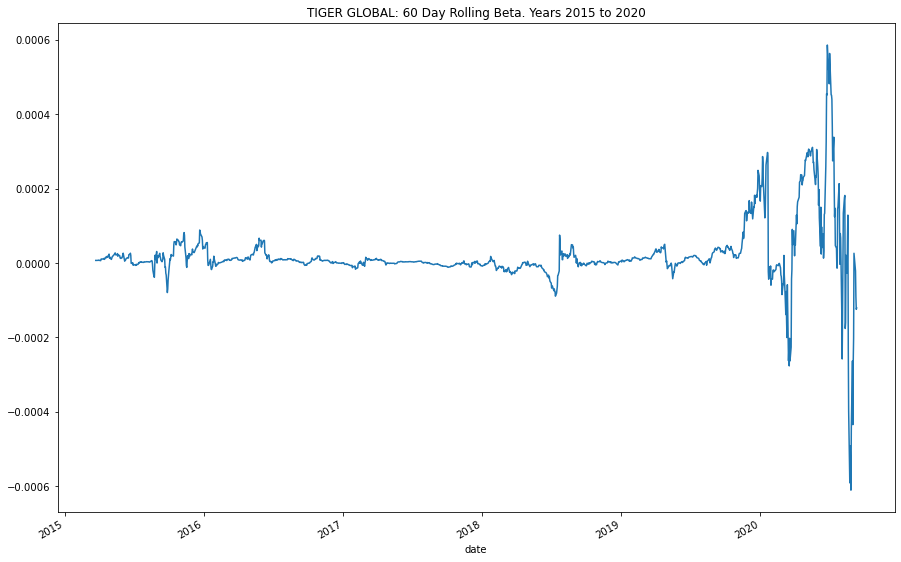

In [91]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
print()
print("TIGER GLOBAL - Average 60 Day Rolling Beta")
tiger_beta.plot(figsize=(15,10),
                    title="TIGER GLOBAL: 60 Day Rolling Beta. Years 2015 to 2020")



Portfolio Comparison: Berksire Hathaway and Tiger Global
Average 60 Day Rolling Beta


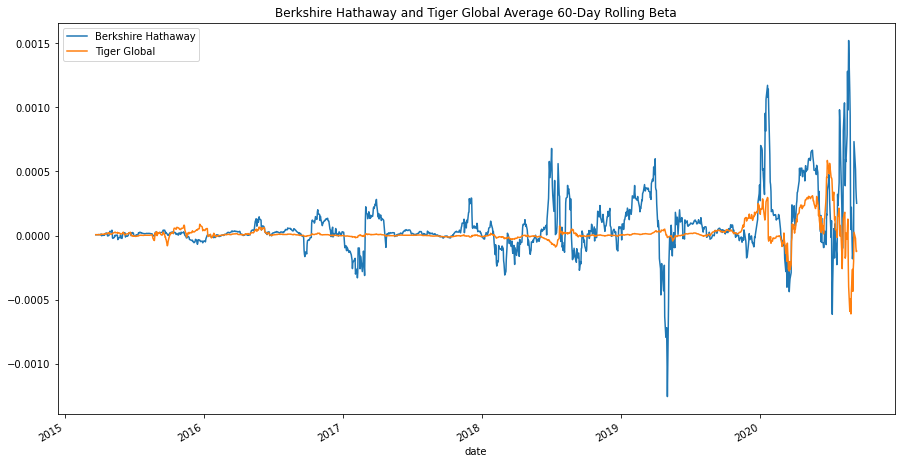

In [97]:
print()
print("Portfolio Comparison: Berksire Hathaway and Tiger Global")
print("Average 60 Day Rolling Beta") 
ax = berkshire_beta.plot(figsize=(15,8),title="Berkshire Hathaway and Tiger Global Average 60-Day Rolling Beta")
tiger_beta.plot(ax=ax)
ax.legend(["Berkshire Hathaway","Tiger Global"])

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Berkshire Hathaway appears to respond more to changes in the S&P 500, based on the average 60 day rolling beta, over the years analyzed.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** Based on the higher risk return profile, I recommend the Berkshire Hathaway fund.

---